In [2]:
pwd

'C:\\Users\\woute\\Documents\\Reproduction_project\\HEAT_Reproduction'

In [50]:
import pickle
from plot import plot_graph_rplan, plot_polygons_rplan, plot_polygon, plot_polygon_inside
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.collections import PatchCollection
from utils import ROOM_ARRAY_Z
import numpy as np
import shapely
from shapely.geometry import Polygon, MultiPolygon, Point

C:\Users\woute\AppData\Local\Temp\ipykernel_2632\1435557143.py:8: UserWarning: Unpickling a shapely <2.0 geometry object. Please save the pickle again; shapely 2.1 will not have this compatibility.
  polygon = pickle.load(open('../RPLAN/geometry/10.pickle', 'rb'))


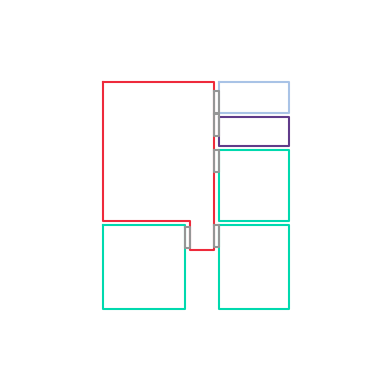

In [149]:
"""
This code prints a polygon as saved in the geometry files. I suspect that it only plot the edges of
the walls. It could maybe be possible to select the interior walls and print those. Or select the
interior and exterior walls and convert them to a annot.npy file.
"""
COLORS = [np.array(ROOM_ARRAY_Z[n][1])/255 for n in range(18)]

polygon = pickle.load(open('../RPLAN/geometry/10.pickle', 'rb'))

# fig, axs = plt.subplots(figsize=(250/DPI, 250/DPI), dpi=DPI)
fig, axs = plt.subplots()
# This makes the image based on the polygon input
plot_polygons_rplan(polygon, axs, colors=COLORS)

In [101]:
"""
Open annot.py file. and anot file is a special type of dictionary within an numpy array.
The annot is a dictionary with as keys the corners and corresponding value is a list of the corners
to which the key corner is connected. The annot files provide a list of interior and exterior walls.
"""
PATH_ANNOT = r'..\heat\data\s3d_floorplan\annot\00035.npy'
annot = np.load(PATH_ANNOT,allow_pickle=True)
print('annot is type:',type(annot))
print('annot_item is type:',type(annot.item()))
corner_connections = dict(annot.item())
print('corner_connections is type:',type(corner_connections))
corners = corner_connections.keys()

for corner in corners:
    print('corner at:',corner,'is connected to:',corner_connections[corner])


annot is type: <class 'numpy.ndarray'>
annot_item is type: <class 'collections.defaultdict'>
corner_connections is type: <class 'dict'>
corner at: (135.0, 233.0) is connected to: [(135, 197), (52.0, 233.0)]
corner at: (52.0, 233.0) is connected to: [(52, 197), (135.0, 233.0)]
corner at: (52, 197) is connected to: [(52.0, 130.0), (135, 197), (52.0, 233.0)]
corner at: (135, 197) is connected to: [(52, 197), (193, 197), (135.0, 233.0)]
corner at: (233, 145) is connected to: [(233.0, 197.0), (193, 145), (233.0, 100.0)]
corner at: (233.0, 100.0) is connected to: [(233, 145), (193.0, 100.0)]
corner at: (193.0, 100.0) is connected to: [(193, 36), (193, 107), (233.0, 100.0)]
corner at: (193, 107) is connected to: [(127, 107), (193, 145), (193, 100)]
corner at: (193, 145) is connected to: [(193, 197), (193, 107), (233, 145)]
corner at: (21.0, 36.0) is connected to: [(52, 36), (21.0, 107.0)]
corner at: (21.0, 107.0) is connected to: [(30, 107), (21.0, 36.0)]
corner at: (30, 107) is connected to:

In [121]:
polygon

([{0: <POLYGON ((64 50, 64 146, 124 146, 124 166, 141 166, 141 50, 64 50))>,
   1: <POLYGON ((64 149, 64 207, 121 207, 121 149, 64 149))>,
   2: <POLYGON ((144 149, 144 207, 193 207, 193 149, 144 149))>,
   3: <POLYGON ((144 50, 144 71, 193 71, 193 50, 144 50))>,
   4: <POLYGON ((144 74, 144 94, 193 94, 193 74, 144 74))>,
   5: <POLYGON ((144 97, 144 146, 193 146, 193 97, 144 97))>},
  {0: <POLYGON ((141 56, 141 71, 144 71, 144 56, 141 56))>,
   1: <POLYGON ((141 72, 141 87, 144 87, 144 72, 141 72))>,
   2: <POLYGON ((141 97, 141 112, 144 112, 144 97, 141 97))>,
   3: <POLYGON ((141 149, 141 164, 144 164, 144 149, 141 149))>,
   4: <POLYGON ((121 150, 121 165, 124 165, 124 150, 121 150))>},
  {0: <POLYGON ((144 50, 144 71, 193 71, 193 50, 144 50))>,
   1: <POLYGON ((144 74, 144 94, 193 94, 193 74, 144 74))>,
   2: <POLYGON ((144 97, 144 146, 193 146, 193 97, 144 97))>,
   3: <POLYGON ((64 50, 64 146, 124 146, 124 166, 141 166, 141 50, 64 50))>,
   4: <POLYGON ((61 47, 61 210, 124 210, 

7
POLYGON ((61 47, 61 210, 124 210, 124 169, 141 169, 141 210, 195 210, 196 210, 196 47, 61 47), (144 149, 193 149, 193 207, 144 207, 144 149), (64 50, 64 146, 124 146, 124 166, 141 166, 141 50, 64 50), (64 149, 121 149, 121 207, 64 207, 64 149), (144 50, 144 71, 193 71, 193 50, 144 50), (144 97, 193 97, 193 146, 144 146, 144 97), (144 74, 144 94, 193 94, 193 74, 144 74))


C:\Users\woute\AppData\Local\Temp\ipykernel_2632\2964541286.py:7: UserWarning: Unpickling a shapely <2.0 geometry object. Please save the pickle again; shapely 2.1 will not have this compatibility.
  polygon = pickle.load(open('../RPLAN/geometry/10.pickle', 'rb'))


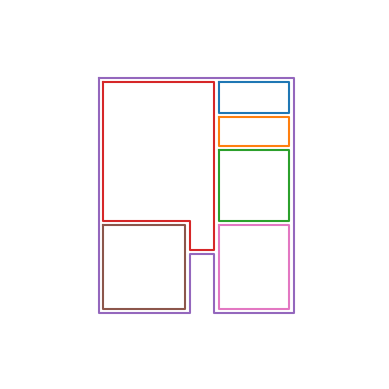

In [185]:
"""
The geometry files contain. A tuple, with infomation about the geometry of the rooms. Rooms are
notated as polygons. Which can be seperatly plotted with the plot_polygon function. We suspect
that only polygons of the wall_type are needed for the creation of a annot file.
"""
# first lets load a polygon
polygon = pickle.load(open('../RPLAN/geometry/10.pickle', 'rb'))

# first lets seperate a polygon type into its components:
room_polygons, room_types = polygon[0][0], polygon[1][0]
door_polygons, door_types = polygon[0][1], polygon[1][1]
wall_polygons, wall_types = polygon[0][2], polygon[1][2]

print(len(wall_polygons.keys()))
print(wall_polygons[4])
#create an image
fig1, ax = plt.subplots()
ax.imshow(np.zeros((256, 256)), alpha=0)
ax.axis('off')


# first let plot the walls
for key in wall_polygons.keys():
    plot_polygon(ax,wall_polygons[key])
    
# Lets create a polygon called wall_surface which indicates the wall eg between the rooms

To check the accuracy of the predicted labels (generated Annot files) a GT labels (geometry files) correspond to the. We simply check wether a the predicted corners and edges lie within the wall surface. The wall-surface is a surface from the Shapely module. This surface can 'hopefully' be crated using the wall-polygons. 
One easy to spot problem with this approach is the following:
- if the predicted corners and edges are all within one wall. Then the algoritm will label the predictions as correct while the geometry of the floorplan is compleetly incorrect.


